# Understanding US Police Shooting Fatality

Let's get granular police shooting data to check if what we hear in the hears about police shooting fatality is consistent with actual data.

In [1]:
# Police Shooting in 2020
us_2020_url = 'http://findmarley.org/the-data/database/2020'
us_2019_url = 'http://findmarley.org/the-data/database/2019'

us_2020_file = 'input/marley-police-fatality-2020june.csv'
us_2019_file = 'input/marley-police-fatality-2019.csv'

In [2]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
import math

ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

In [3]:
# df = pd.read_html(us_2020_url)

In [4]:
df = pd.read_csv(us_2019_file, encoding='utf-8', index_col='ID', parse_dates=True)

In [5]:
df.shape

(1795, 9)

In [6]:
df.describe()

,AGE
count,1795.000000
mean,34.812256
std,16.705357
min,0.000000
25%,25.000000
50%,34.000000
75%,45.000000
max,91.000000


In [7]:
df.columns

Index(['DATE', 'NAME', 'AGE', 'GENDER', 'RACE', 'AGENCY', 'CITY', 'STATE',
       'BRIEF'],
      dtype='object')

In [8]:
df.head(3)

,DATE,NAME,AGE,GENDER,RACE,AGENCY,CITY,STATE,BRIEF
ID,,,,,,,,,
25378,1/1/19,Dylan Michael Smith,26,Male,European-American/White,Davidson County Sheriff's Office,Alleghany,NC,A deputy responded to a domestic disturbance c...
25379,1/1/19,Brandon Lovell Webster,28,Male,African-American/Black,North Carolina State Highway Patrol,Shallotte,NC,Trooper S.A. Collins initiated a traffic stop ...
25470,1/1/19,Charles Garrett lll,36,Male,African-American/Black,Savannah Police Department,Savannah,GA,Officers were called to City Market because a ...


In [9]:
# need to sort index by Date

df['DATE'] = pd.to_datetime(df.DATE)
df.sort_values(by='DATE')
df.head(5)

,DATE,NAME,AGE,GENDER,RACE,AGENCY,CITY,STATE,BRIEF
ID,,,,,,,,,
25378,2019-01-01,Dylan Michael Smith,26,Male,European-American/White,Davidson County Sheriff's Office,Alleghany,NC,A deputy responded to a domestic disturbance c...
25379,2019-01-01,Brandon Lovell Webster,28,Male,African-American/Black,North Carolina State Highway Patrol,Shallotte,NC,Trooper S.A. Collins initiated a traffic stop ...
25470,2019-01-01,Charles Garrett lll,36,Male,African-American/Black,Savannah Police Department,Savannah,GA,Officers were called to City Market because a ...
25985,2019-01-01,Ja'Ron Nero,23,Male,African-American/Black,Canton Police Department,Canton,OH,Ja'Ron Nero's body was found in the Nimishille...
25380,2019-01-02,Abdoulaye Thiam,20,Male,African-American/Black,Memphis Police Department,Memphis,TN,Police were called to a home at 8 p.m. for a d...


In [10]:
daily_count_series = df.groupby('DATE')['AGE'].count()
daily_count_series.shape

(361,)

In [11]:
daily_count_series.head(5)

DATE
2019-01-01    4
2019-01-02    7
2019-01-03    7
2019-01-04    6
2019-01-05    7
Name: AGE, dtype: int64

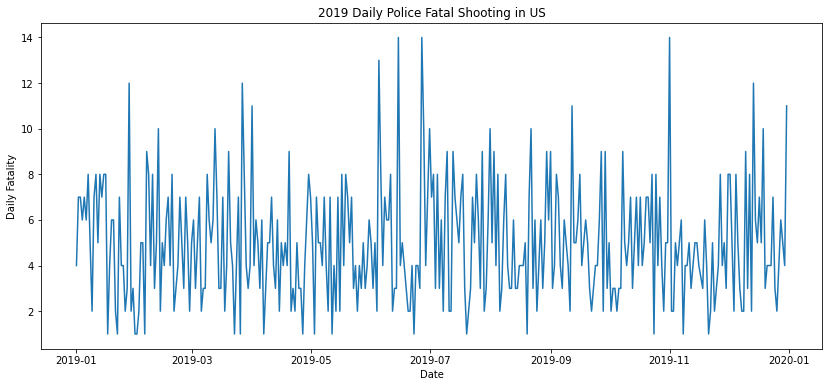

In [12]:
fig = plt.figure(figsize=(14,6)); np.random.seed(123)

plt.title("2019 Daily Police Fatal Shooting in US")
plot_ = sns.lineplot(data=daily_count_series)

plt.ylabel('Daily Fatality')
plt.xlabel('Date')

plt.MaxNLocator(12)

In [13]:
print(plot_.get_xticklabels())

<a list of 7 Text major ticklabel objects>


In [14]:
daily_count_series.tail(5)

DATE
2019-12-27     4
2019-12-28     6
2019-12-29     5
2019-12-30     4
2019-12-31    11
Name: AGE, dtype: int64

### Age distribution

In [15]:
age_death_input = df.groupby('AGE')['DATE'].size()

In [16]:
print(type(age_death_input))
age_death_input.head(5)

<class 'pandas.core.series.Series'>


AGE
0    116
1      2
2      2
4      1
5      1
Name: DATE, dtype: int64

In [17]:
del age_death_input[0]
age_death_input.head(5)

AGE
1    2
2    2
4    1
5    1
6    3
Name: DATE, dtype: int64

In [18]:
# remove AGE=0 which means unspecified AGE
age_death_input.shape

(84,)

In [19]:
age_death_input.index.max()

91

In [20]:
zeros = np.zeros(age_death_input.index.max())
len(zeros)

91

In [21]:
type(zeros)

numpy.ndarray

In [25]:
age_death = pd.DataFrame(zeros, 
                         columns=['DEATHS'],
                         dtype='int32',
                         index=np.arange(1, len(zeros)+1))
age_death

,DEATHS
1,0
2,0
3,0
4,0
5,0
...,...
87,0
88,0
89,0
90,0


In [26]:
for age,deaths in age_death_input.items():
    age_death.at[age,'DEATHS'] = deaths

In [27]:
age_death

,DEATHS
1,2
2,2
3,0
4,1
5,1
...,...
87,1
88,0
89,1
90,0


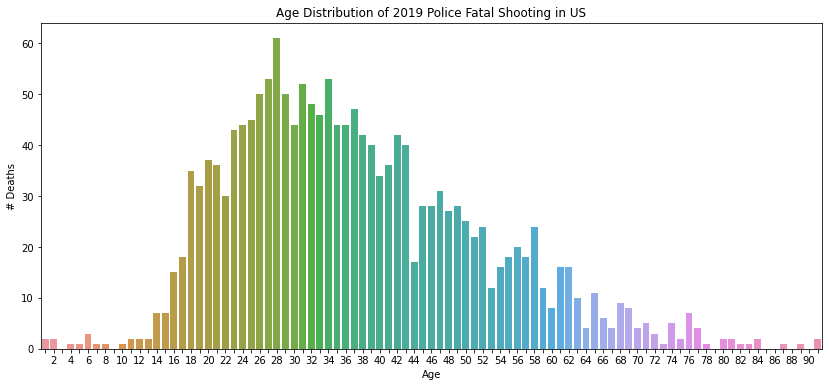

In [28]:
fig = plt.figure(figsize=(14,6)); np.random.seed(123)

plt.title("Age Distribution of 2019 Police Fatal Shooting in US")
# ax = sns.barplot(x=age_death.index, y=age_death)
ax = sns.barplot(x=age_death.index, y=age_death['DEATHS'])

plt.ylabel('# Deaths')
plt.xlabel('Age')

for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

(0.0, 107.86503969788963)

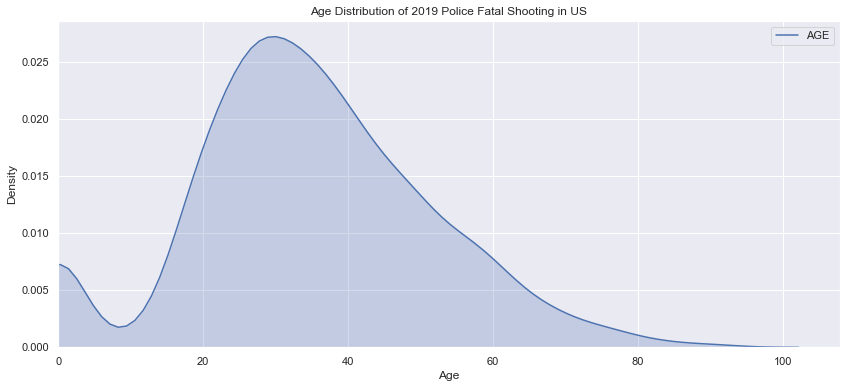

In [30]:
sns.set(color_codes=True)
fig = plt.figure(figsize=(14,6)); np.random.seed(123)

plt.title("Age Distribution of 2019 Police Fatal Shooting in US")
ax = sns.kdeplot(df.AGE, shade=True)

plt.ylabel('Density')
plt.xlabel('Age')
plt.xlim(0, None)

#for label in ax.get_xticklabels()[::2]:
#    label.set_visible(False)

In [31]:
df.groupby(['GENDER', 'RACE'])['DATE'].count()

GENDER              RACE                   
Female              African-American/Black      46
                    Asian/Pacific Islander       6
                    European-American/White     86
                    Hispanic/Latino             14
                    Race unspecified            24
Gender Unspecified  European-American/White      1
                    Hispanic/Latino              3
                    Race unspecified            11
Male                African-American/Black     375
                    Asian/Pacific Islander      32
                    European-American/White    541
                    Hispanic/Latino            216
                    Middle Eastern               4
                    Native American/Alaskan     16
                    Race unspecified           419
Transgender         Race unspecified             1
Name: DATE, dtype: int64

## US Population Characteriziation

Source: https://www.census.gov/quickfacts/fact/table/US/IPE120218

Population estimates, July 1, 2019, (V2019)	328,239,523

| Race and Ethnicity | Percentage | People |
| -------------------| -----------|--------|
| White                               | 76.5% | 251103235|
| Black or African American           | 13.4% | 43984096 |
| American Indian and Alaska Native   | 1.3%  | 4267114  |
| Asian                               | 5.9%  | 19366132 |
| Native Hawaiian Pacific Islander    | 0.2%  | 656479   |
| Two or More Races                   | 2.7%  | 8862467  |
| Hispanic or Latino                  | 18.3% | 60067833 |
| White alone, not Hispanic or Latino | 60.4% | 198256672|



In [32]:
race_death_count = df.groupby(['RACE'])['DATE'].count()
race_death_count

RACE
African-American/Black     421
Asian/Pacific Islander      38
European-American/White    628
Hispanic/Latino            233
Middle Eastern               4
Native American/Alaskan     16
Race unspecified           455
Name: DATE, dtype: int64

In [33]:
US_POPULATION_2019 = 328239523

In [34]:
race_data = pd.DataFrame({ 'Race' : 
                                [
                                 'Asian/Pacific Islander', 
                                 'European-American/White', 
                                 'Native American/Alaskan',
                                 'Hispanic/Latino',
                                 'African-American/Black', 
                                ],
                            'Population' :
                                 [
                                  19366132+656479,
                                  251103235, 
                                  4267114,
                                  60067833,
                                  43984096, 
                                  ],
                             'Deaths' : np.zeros(5),
                             'Rate' : np.zeros(5)
                         })
race_data.set_index('Race')

,Population,Deaths,Rate
Race,,,
Asian/Pacific Islander,20022611,0.0,0.0
European-American/White,251103235,0.0,0.0
Native American/Alaskan,4267114,0.0,0.0
Hispanic/Latino,60067833,0.0,0.0
African-American/Black,43984096,0.0,0.0


In [35]:
# calculate deaths per 100,000 people

for race,deaths in race_death_count.items():
    population = race_data.loc[ race_data['Race']==race ]['Population']
    scale = population / US_POPULATION_2019 * 100000.0
    
    race_data.loc[ race_data['Race']==race, 'Deaths'] = deaths
    race_data.loc[ race_data['Race']==race, 'Rate'] = deaths / scale


In [36]:
race_data

,Race,Population,Deaths,Rate
0,Asian/Pacific Islander,20022611,38.0,0.006230
1,European-American/White,251103235,628.0,0.008209
2,Native American/Alaskan,4267114,16.0,0.012308
3,Hispanic/Latino,60067833,233.0,0.012732
4,African-American/Black,43984096,421.0,0.031418


Text(0.5, 0, '')

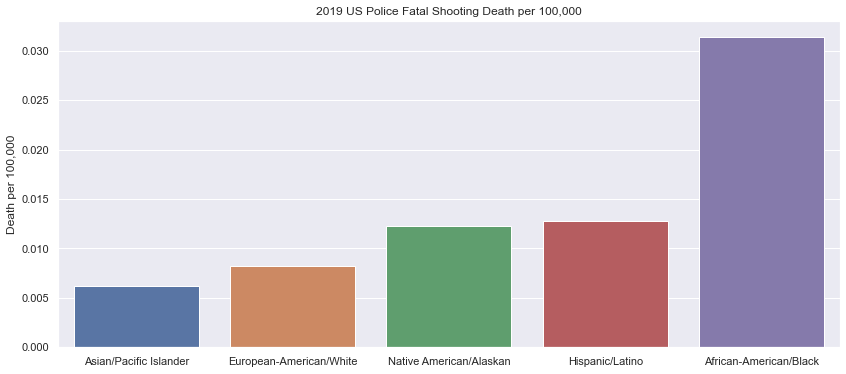

In [37]:
fig = plt.figure(figsize=(14,6)); np.random.seed(123)

plt.title("2019 US Police Fatal Shooting Death per 100,000")
ax = sns.barplot(x=race_data.Race, y=race_data.Rate)

plt.ylabel('Death per 100,000')
plt.xlabel('')

In [39]:
df.groupby('RACE')['AGE'].mean()

RACE
African-American/Black     32.014252
Asian/Pacific Islander     38.342105
European-American/White    39.628981
Hispanic/Latino            32.502146
Middle Eastern             32.500000
Native American/Alaskan    32.187500
Race unspecified           31.753846
Name: AGE, dtype: float64

In [40]:
df.groupby(['RACE', 'GENDER'])['AGE'].mean()

RACE                     GENDER            
African-American/Black   Female                35.869565
                         Male                  31.541333
Asian/Pacific Islander   Female                41.833333
                         Male                  37.687500
European-American/White  Female                36.569767
                         Gender Unspecified     0.000000
                         Male                  40.188540
Hispanic/Latino          Female                36.857143
                         Gender Unspecified     0.000000
                         Male                  32.671296
Middle Eastern           Male                  32.500000
Native American/Alaskan  Male                  32.187500
Race unspecified         Female                30.291667
                         Gender Unspecified     0.000000
                         Male                  32.670644
                         Transgender           32.000000
Name: AGE, dtype: float64